# **[실습] 웹검색 도구를 기반으로 구현하는 ReAct Agent**

In [ ]:
!pip install -qU langchain_community langgraph langchain_openai langchain_upstage langchain_tavily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.2/153.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.5/443.5 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 11.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently t

In [ ]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")
_set_env("UPSTAGE_API_KEY")
_set_env("TAVILY_API_KEY")

OPENAI_API_KEY: ··········
UPSTAGE_API_KEY: ··········
TAVILY_API_KEY: ··········


### **LLM 사용하는 법**

In [ ]:
from langchain_upstage import ChatUpstage

llm = ChatUpstage(model="solar-pro-250422")
response = llm.invoke("Hello, how are you?")
print(response)

content="Hello! I'm an AI, so I don't have feelings, but I'm here and ready to help you. How can I assist you today? \n" additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 15, 'total_tokens': 54, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'solar-pro-250422', 'system_fingerprint': None, 'id': '0fae4ab0-804e-4745-a7b1-82653578cec6', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None} id='run--9fe78bc0-ce01-4743-8343-84690f8ebf17-0' usage_metadata={'input_tokens': 15, 'output_tokens': 39, 'total_tokens': 54, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")
response = llm.invoke("Hello, how are you?")
print(response)

content="Hello! I'm an AI, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?" additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 13, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_ff25b2783a', 'id': 'chatcmpl-C3ggeF1X3d2fccHhPQJEqjoZVGrAK', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--e4932e42-5d82-4c76-90b6-1b580f97c597-0' usage_metadata={'input_tokens': 13, 'output_tokens': 28, 'total_tokens': 41, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


## 🔎 웹검색을 위한 Tavily Search


Tavily Search : 실시간 웹 검색 엔진 https://docs.tavily.com/documentation/api-reference/endpoint/search

https://python.langchain.com/docs/integrations/tools/tavily_search/


파라미터 :

- `max_results` (optional, int): 검색 결과 반환 수

- `topic` (optional, str): 검색 카테고리 / "general"(Default), "news", "finance"

- `include_answer` (optional, bool): 쿼리에 대한 답변 포함 여부

- `include_raw_content` (optional, bool): 결과 HTML 포함 여부

- `include_images` (optional, bool): 쿼리 관련 이미지 목록 포함 여부

- `include_image_descriptions` (optional, bool): 각 이미지에 대한 설명 텍스트 포함 여부

- `search_depth` (optional, str): 검색 깊이 / "basic"(Default),"advanced"

- `time_range` (optional, str): 필터링 날짜 범위 - "day", "week", "month", "year"

- `include_domains` (optional, List[str]): 구체적으로 포함할 도메인 목록

- `exclude_domains` (optional, List[str]): 구체적으로 제외할 도메인 목록

In [ ]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results=3)
tool.invoke("2025년 여름 한강 축제")

{'query': '2025년 여름 한강 축제',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://walkershigh.tistory.com/237',
   'title': '2025 여름축제 추천 한강몽땅페스티벌 일정·위치·예약 정보까지 한눈에!',
   'content': '행사 개요 · 기간: 2025년 8월 1일(금) ~ 8월 17일(일) – 총 17일간 개최 · 장소: 여의도·뚝섬·반포 등 한강공원 주요 구간 · 주최: 서울특별시 미래한강본부',
   'score': 0.91137725,
   'raw_content': None},
  {'url': 'https://sldkqm7.tistory.com/v/106',
   'title': '2025년 여름 수국 및 물축제 총정리',
   'content': '4. 2025한강페스티벌 여름축제 (서울) · 기간: 8월 1일 ~ 8월 17일 · 장소: 여의도·반포·잠실 등 한강공원 일대 · 특징: PET 보트 레이스, 42km 야간 산책, 뮤직 피크닉 · 2025',
   'score': 0.8834878,
   'raw_content': None},
  {'url': 'https://www.instagram.com/hangangfestival/',
   'title': '한강페스티벌 (@hangangfestival) · Seoul - Instagram',
   'content': '2025 한강페스티벌-여름 2025. 8. 12.(화)~2025. 8. 18.(월) 4주차 프로그램 안내 여름이 선물하는 가장 반짝이는 시간, 볼거리, 즐길 거리 가득한 한강에서 잊지',
   'score': 0.8732259,
   'raw_content': None}],
 'response_time': 1.2}

### LLM이 질문에 적합한 Tool을 호출하기 (Binding Tools)

- https://python.langchain.com/v0.1/docs/modules/model_io/chat/function_calling/#request-passing-tool-outputs-to-model

In [ ]:
from langchain_core.tools import tool

@tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """Multiplies a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

tools = [add, multiply]

In [ ]:
# llm = ChatOpenAI(model="gpt-4o")
llm = ChatUpstage(model="solar-pro-250422")
llm_with_tools = llm.bind_tools(tools)

In [ ]:
query = "3*12 는 무엇인가요? 11 + 49도 알려주세요."

test1 = llm_with_tools.invoke(query)

In [ ]:
test1

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'e7a3a0ff-4f52-4c48-a99c-c240a4a4aa93', 'function': {'arguments': '{"a":3,"b":12}', 'name': 'multiply'}, 'type': 'function'}, {'id': '2a4b15d8-b71a-4140-949a-140fd2f6d0cc', 'function': {'arguments': '{"a":11,"b":49}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 372, 'total_tokens': 463, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'solar-pro-250422', 'system_fingerprint': None, 'id': '310b8207-c21c-498d-ba65-dbb39accc408', 'service_tier': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c1e5527f-a7d3-4d08-9c8d-66c808320c99-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 12}, 'id': 'e7a3a0ff-4f52-4c48-a99c-c240a4a4aa93', 'type': 'tool_call

In [ ]:
test1.tool_calls

[{'name': 'multiply',
  'args': {'a': 3, 'b': 12},
  'id': 'e7a3a0ff-4f52-4c48-a99c-c240a4a4aa93',
  'type': 'tool_call'},
 {'name': 'add',
  'args': {'a': 11, 'b': 49},
  'id': '2a4b15d8-b71a-4140-949a-140fd2f6d0cc',
  'type': 'tool_call'}]

In [ ]:
query = "안녕"

test2 = llm_with_tools.invoke(query)

In [ ]:
test2

AIMessage(content='안녕하세요! 어떤 도움이 필요하신가요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 355, 'total_tokens': 366, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'solar-pro-250422', 'system_fingerprint': None, 'id': '11f1b293-6e11-4229-95b1-ef45035d8829', 'service_tier': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d5e24335-7940-4c1e-a8e6-c6113a415020-0', usage_metadata={'input_tokens': 355, 'output_tokens': 11, 'total_tokens': 366, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
test2.tool_calls

[]

### **Tavily Search 적용하기**

In [ ]:
tool = TavilySearch(max_results=2)
tools = [tool]

# llm = ChatOpenAI(model="gpt-4o")
llm = ChatUpstage(model="solar-pro-250422")
llm_with_tools = llm.bind_tools(tools) # TavilySearch(tools) 을 호출할 수 있도록 함

In [ ]:
test3 = llm_with_tools.invoke("안녕")

In [ ]:
test3

AIMessage(content='안녕하세요! 어떤 도움이 필요하신가요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 2074, 'total_tokens': 2085, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'solar-pro-250422', 'system_fingerprint': None, 'id': 'e598fe65-91a5-47ab-a13e-6b515d65dbfd', 'service_tier': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--047edd3d-5915-473f-95fb-7a8fba5ae7b9-0', usage_metadata={'input_tokens': 2074, 'output_tokens': 11, 'total_tokens': 2085, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
test3.tool_calls

[]

In [ ]:
test4 = llm_with_tools.invoke("AI Agent를 사용하는 기업에는 어떤 곳이 있나요?")

In [ ]:
test4

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '4f1c2e79-7e1b-4e7b-91e9-b528f1819322', 'function': {'arguments': '{"query":"AI Agent companies","search_depth":"advanced","topic":"general"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 81, 'prompt_tokens': 2082, 'total_tokens': 2163, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'solar-pro-250422', 'system_fingerprint': None, 'id': '49369755-d9df-42da-a0ca-9165ae553f90', 'service_tier': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--40e8db23-0fe8-47ee-846f-1d3b2d4fe8d2-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'AI Agent companies', 'search_depth': 'advanced', 'topic': 'general'}, 'id': '4f1c2e79-7e1b-4e7b-91e9-b528f1819322', 'type': 'tool

In [ ]:
test4.tool_calls

[{'name': 'tavily_search',
  'args': {'query': 'AI Agent companies',
   'search_depth': 'advanced',
   'topic': 'general'},
  'id': '4f1c2e79-7e1b-4e7b-91e9-b528f1819322',
  'type': 'tool_call'}]

## 🤖 웹 검색을 기반으로 답변하는 Agent 만들기

- Tool을 호출하고 그 결과를 모델(LLM)로 전달하기



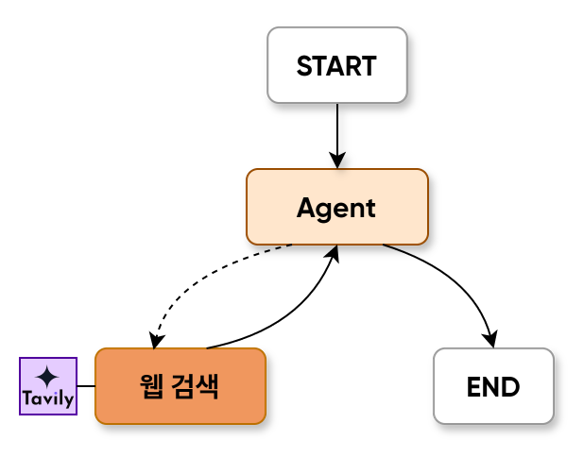


### **State** - 그래프의 상태 (기억(추적)해야하는 값)

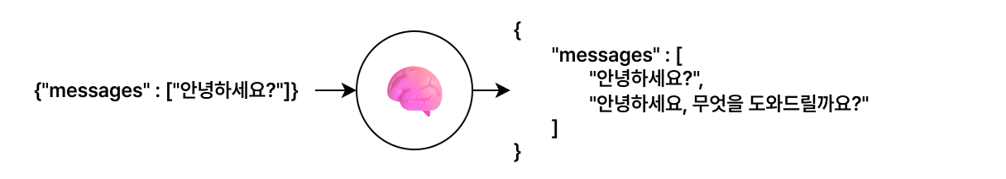

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

`add_messages` : 메시지를 리스트에 추가하기 위한 함수

```python
msgs1 = [HumanMessage(content="안녕하세요?", id="1")]
msgs2 = [AIMessage(content="반갑습니다.", id="2")]

result1 = add_messages(msgs1, msgs2)
# [HumanMessage(content='안녕하세요?', additional_kwargs={}, response_metadata={}, id='1'), AIMessage(content='반갑습니다.', additional_kwargs={}, response_metadata={}, id='2')]
```

### **Node** - 실제 작업을 수행하는 단위

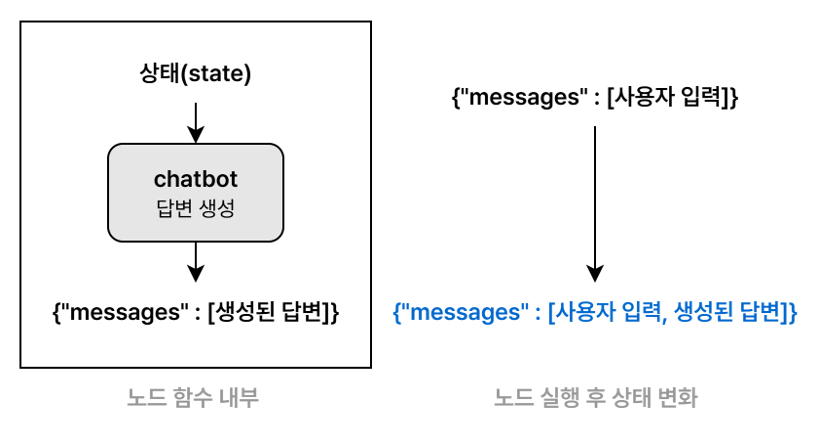

**chatbot**

노드의 반환값(return) 은 state 업데이트 값!

In [ ]:
def chatbot(state: State): # Agent
    response = llm_with_tools.invoke(state["messages"]) # tool_calls 가 채워져있는 답변 or tool_calls 가 비워져 있는 답변
    return {"messages": [response]}

graph_builder.add_node("chatbot", chatbot)

**tools**

tool(도구) 실행을 위한 노드 추가!

In [ ]:
from langgraph.prebuilt import ToolNode

tool_node = ToolNode(tools=[tool]) # 웹검색도구를 실행하는 노드
graph_builder.add_node("tools", tool_node)

### **Edge** - 노드 간의 연결

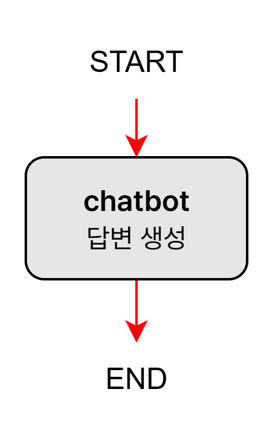

**조건부 엣지, 라우팅 (add_conditional_edges)**

`tools_condition` : 도구 호출 시 분기처리를 위한 함수
- 마지막 메시지에 tool_calls 가 포함된 경우 ToolNode로 라우팅되도록 conditional_edge에서 사용

In [ ]:
from langgraph.prebuilt import tools_condition

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition, # 도구 호출이 발생했는지 발생하지 않았는 지 판단해주는 함수
    {"tools": "tools", END: END},
)

In [ ]:
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

### **그래프 시각화**

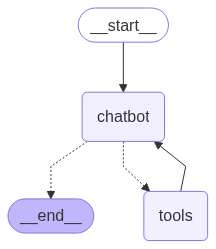

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

### **실행**

In [ ]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        response = graph.invoke({"messages": ("user", user_input)})
        for msg in response["messages"]:
            msg.pretty_print()
    except:
        break

User: 안녕하세요
================================ Human Message =================================

안녕하세요
================================== Ai Message ==================================

안녕하세요! 어떤 도움이 필요하신가요?
User: Langgraph 가 뭔가요?
================================ Human Message =================================

Langgraph 가 뭔가요?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (03bf361f-8477-46ec-9312-2839ed55e6a0)
 Call ID: 03bf361f-8477-46ec-9312-2839ed55e6a0
  Args:
    query: Langgraph
    search_depth: advanced
    topic: general
================================= Tool Message =================================
Name: tavily_search

{"query": "Langgraph", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.ibm.com/think/topics/langgraph", "title": "What is LangGraph? - IBM", "content": "LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manag

## 부록) 사전구축 ReAct Agent

`create_react_agent` : 중지 조건이 충족될 때까지 루프에서 도구를 호출하는 사전구축 에이전트 그래프

In [ ]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI
# from langchain_upstage import ChatUpstage

tool = TavilySearch(max_results=2)
tools = [tool]

llm = ChatOpenAI(model="gpt-4o")
# llm = ChatUpstage(model="solar-pro-250422")
agent = create_react_agent(llm, tools)

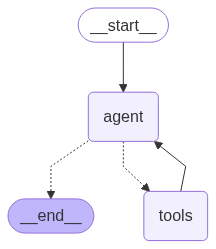

In [ ]:
agent

In [ ]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        response = agent.invoke({"messages": ("user", user_input)})
        for msg in response["messages"]:
            msg.pretty_print()
    except:
        break

User: AI Agent 에 대해 알려주세요
================================ Human Message =================================

AI Agent 에 대해 알려주세요
================================== Ai Message ==================================

AI 에이전트는 특정 작업을 자동화하거나 단순화하기 위해 설계된 소프트웨어 프로그램입니다. 이러한 에이전트는 인공지능(Artificial Intelligence) 기술을 기반으로 하며, 사용자의 요구나 환경에 따라 다양한 작업을 수행할 수 있습니다. AI 에이전트는 다음과 같은 주요 특징을 가지고 있습니다.

1. **자율성:** AI 에이전트는 인간의 직접적인 개입 없이도 독립적으로 작동할 수 있습니다.
2. **학습 능력:** 머신러닝 알고리즘을 사용하여 데이터를 분석하고, 그에 따라 행동을 조정할 수 있습니다.
3. **적응력:** 변화하는 환경이나 요구에 따라 적응하여 새로운 상황에서도 효율적으로 작업을 수행할 수 있습니다.
4. **상호작용:** 사용자와 또는 다른 시스템과 상호작용하여 필요한 정보를 수집하거나 제공할 수 있습니다.

AI 에이전트는 다양한 분야에서 활용되고 있으며, 예를 들어 고객서비스 챗봇, 개인 비서(예: Siri, Alexa), 자동화된 마케팅 솔루션, 혹은 복잡한 데이터 분석을 위한 도구 등으로 사용됩니다. 이러한 에이전트는 기업의 운영을 개선하고 사용자에게 더 나은 서비스를 제공하는데 중요한 역할을 하고 있습니다.
User: AI Agent에 대해 검색해서 알려주세요
================================ Human Message =================================

AI Agent에 대해 검색해서 알려주세요
================================== Ai Message ============